# Tarea 9 - Análisis de sentimientos y textos 

En este proyecto pondremos en práctica varias de las herramientas y métodos del Natural Language Processing (NLP)

Para tal fin, hemos escogido como texto a analizar el discurso pronunciado por Barack Obama en la Convención del Partido Demócrata de 2024. En este discurso, quien luego sería Presidente de los Estados Unidos, no solo dió su apoyo al candidato demócrata Jhon Kerry, sino que estableció los cimientos de lo que más tarde sería su propuesta política: utilizar un lenguaje esperanzador para recuperar la confianza de los ciudadanos en que a través de la acción política podían mejorar sus condiciones de vida. Así, en principio, estamos frente a un discurso extremandamente positivo e ilusionante. Utilizaremos el NLP para confirmarlo. 

En este proyecto, lo hemos dividido en las siguientes secciones: 

- 1. Importación de librerías y del texto, limpieza preliminar y descripción (frecuencia de palabras) 
- 2. Preprocesamiento: stopwords, lemantización, stemming / visualización con WordCloud  
- 3. Análisis de sentimientos I: comparación entre diferentes preprocesamientos
- 4. Análisis de sentimientos II: análisis de la estructura sentimental del discurso 

# 1. Importación de librerías y del texto, limpieza preliminar y descripción (frecuencia de palabras)

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
import string
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer



nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')



import warnings
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juanviatela/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juanviatela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juanviatela/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#importamos el .txt y lo guardamos en el objeto Obama
obama = open('obama.txt').read()

In [4]:
#reemplazamos los saltos de línea 
obama = obama.replace('\n', ' ')

#utilizamos regEx para eliminar espacios innecesarios, signos de puntuación y caracteres especiales
texto = re.sub(r'[^\w\s]', '', obama)

#utilizamos regEx para eliminar números 
texto = re.sub(r'\d+', '', texto)

#convertimos a minúsculas. Esto es necesario para implementar los métodos de análisis 
texto = texto.lower()

#eliminamos espacios en blanco al principio y al final del texto
texto = texto.strip()

In [11]:
#tokenizamos el texto - lo convertimos en una lista de palabras
tokens = word_tokenize(texto)

#determinamos su frecuencia 
word_freq = nltk.FreqDist(tokens)

#creamos un dataFrame para visualizar la frecuencia 
df = pd.DataFrame(list(word_freq.items()), columns=['Palabras', 'Frecuencia'])
df = df.sort_values(by='Frecuencia', ascending=False)

#mostramos las primeras 10 entradas
print(df.head(10))

    Palabras  Frecuencia
3        the         105
52        to          72
40       and          72
2         of          57
8          a          56
42        in          55
161     that          41
216       we          35
188        i          26
220      our          22


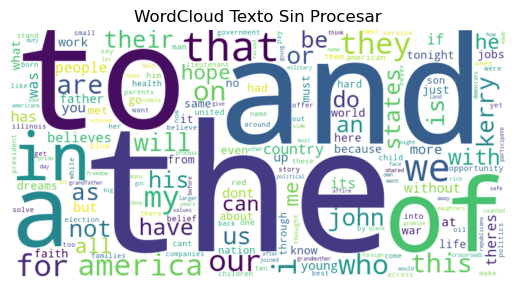

In [30]:
#creamos un objeto para generar el wordcloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_freq)

#pintamos el gráfico y configuramos títulos
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud Texto Sin Procesar')
plt.show()

Con la visualización del dataframe podemos observar que las palabras con mayor frecuencia en el discurso de Obama son artículos, preprosiciones, conjunciones y pronombres. 

Además, contaremos las palabras únicas y las palabras totales del discurso ya tokenizado y observaremos su riqueza lingüística calculando la proporción entre los dos conteos.

Finalmente, tenemos que añadir que la limpieza del texto fue realizada realizada en esta sección para poder introducirlo sin problemas en los modelos. Por tal razón, eliminamos espacios innecesarios, números, carácteres no alfabéticos y pusimos todas las palabras en minúsculas. 

In [160]:
word_total = len(tokens)
unic_word_total = len(set(tokens))
riqueza = unic_word_total/word_total

print('Número de palabras totales: ', word_total)
print('Número de palabras únicas: ', unic_word_total)
print(f'Riqueza lingüística: {riqueza * 100:.2f}%')

Número de palabras totales:  2156
Número de palabras únicas:  772
Riqueza lingüística: 35.81%


Nos encontramos frente a un texto con una alta riqueza lingüística ya que casi el 36% de palabras utilizadas son unicas

# 2. Preprocesamiento: stopwords, lemantización, stemming / visualización.

- Stopwords: en NLP stopwords es un método común para eliminar palabras que no aportan información sustancial sobre el contenido de un texto. Son palabras como las que identificamos que más se repiten en el discurso de Obama (artículos, pronombres, conjunciones, etc). 
- Lemantización: esta técnica de normalización busca reducir las palabras a su forma base o "lema". Utiliza reglas gramaticales y considera el contexto para obtener el lema.
- Steeming: su objetivo es convertir las diferentes formas flexionadas o derivadas de una palabra a una forma base común. Así, reduce la variabilidad de las palabras y agrupa términos relacionados bajo una misma raíz.

En esta sección también visualizaremos la frecuencia de palabras después de cada método de preprocesamiento para observar sus resultados. 

## Stopwords

In [15]:
#creamos el objeto spotwords en el que incluimos su definición y el idioma
stop_words = set(stopwords.words('english'))

#iteramos sobre cada palabra en nuestra lista 'tokens' y eliminamos aquellas que son stop_words
tokens_sin_stopwords = [word for word in tokens if word not in stop_words]

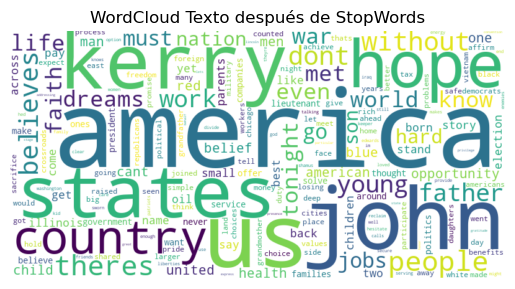

In [31]:
#Visualizamos con WordCloud

word_freq_stopwords = nltk.FreqDist(tokens_sin_stopwords)

#creamos un objeto para generar el wordcloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_freq_stopwords)

#pintamos el gráfico y configuramos títulos
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud Texto después de StopWords')
plt.show()


Con el wordcloud podemos observar que el discurso tiene un carácter aglomerante al utilizar continuamente la palabra 'us' y ' america'. Por supuesto, es recurrente la utilización de 'John Kerry' al ser el candidato nominado. Sin hacer ningún análisis complejo, el stopwords nos permite pensar que la idea central del discurso es "Us, America, have hope in John Kerry". 

In [23]:
word_total_stopwords = len(tokens_sin_stopwords)
unic_word_total_stopwords = len(set(tokens_sin_stopwords))
riqueza = unic_word_total_stopwords/word_total_stopwords

print('Número de palabras totales después de StopWords: ', word_total_stopwords)
print('Número de palabras únicas después de StopWords: ', unic_word_total_stopwords)
print(f'Riqueza lingüística: {riqueza * 100:.2f}%')

Número de palabras totales después de StopWords:  1075
Número de palabras únicas después de StopWords:  670
Riqueza lingüística: 62.33%


Después del aplicar stopwords podemos fijarnos que la aunque el número de palabras totales se redujo considerablemente (pasó de 2156 a 1075), el número de palabras únicas no lo hizo de la misma manera (772 a 670). Por tal razón, la riqueza lingüística del discurso aumentó teniendo el 62% de palabras únicas (de cada 10 palabras 6 son únicas)

## Lemantización

In [34]:
#concateno los elementos tokenizados del discurso sin stopwords
obama_join = ' '.join(tokens_sin_stopwords)

#cargo el método
nlp = spacy.load("en_core_web_sm")

#instancio el método con el discurso concatenado como argumento
doc = nlp(obama_join)

#itero sobre el discurso instanciado para lemantizar cada palabra 
lemmas_token = [token.lemma_ for token in doc]

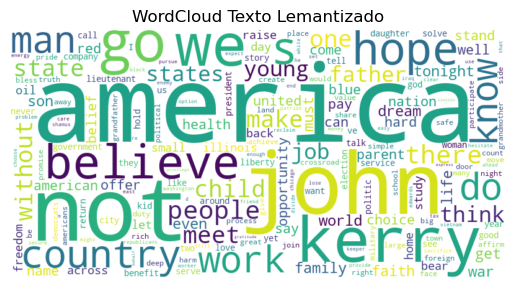

In [35]:
freq_lemmas = nltk.FreqDist(lemmas_token)

wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(freq_lemmas)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud Texto Lemantizado')
plt.show()

En el wordcloud del texto lemantizado podemos observar que se mantiene el sentido básico del discurso, pero en este caso resalta más la palabra "belive" y no "hope". Es decir, podríamos decir que la sintesis del discurso lemantizado podría se: "America believes in John Kerry". Sin embargo, en este caso encontramos que la palabra 'not', que en en general tiene un carácter negativo, está siendo utilizada frecuentemente. 

Para investgiar un poco sobre esta aparente anomalía utilizaremos las herramientas de concordancia y colocación que nos permitirán ver los contextos de utilización de la palabra 'not'

In [37]:
#concordancia
not_context = nltk.Text(lemmas_token)
not_context.concordance("not", lines=4)


Displaying 4 of 14 matches:
ne go good school land even though be not rich generous america do not rich ach
hough be not rich generous america do not rich achieve potential pass away yet 
st louis thousand like grade drive do not money go college do not get wrong peo
rade drive do not money go college do not get wrong people meet small town big 


In [39]:
#colocación
colocacion = nltk.collocations.TrigramCollocationFinder.from_words(lemmas_token)
colocacion.ngram_fd.most_common()
colocacion.ngram_fd.tabulate(6)

   ('john', 'kerry', 'believe') ('kerry', 'believe', 'america')       ('america', 'there', 's') ('united', 'states', 'america')         ('do', 'not', 'expect') ('not', 'expect', 'government') 
                              6                               3                               3                               3                               2                               2 


Con el método de concordancia observamos que la utilización de la palabra "not" se presenta en el contexto de subrayar que personas que no son ricas "not rich" lograron ir a una universidad y alcanzar su potencial. 

Con la colocación, viendo los tríos de palabras podemos entender que la utilización de 'not' también se refiere a que los ciudadanos norteamericanos no esperan que su gobierno lo solucione todo y que han conseguido muchas cosas por sus propios medios. 

Podríamos sintetizar las dos cosas diciendo: En Estados Unidos incluso las personas pobres son capaces de conseguir muchas cosas con su propio esfuerzo pues saben que el gobierno no les dará todo. 

Veamos ahora la frecuencia de palabras del discurso lemantizado

In [40]:
word_total_lemmas = len(lemmas_token)
unic_word_total_lemmas = len(set(lemmas_token))
riqueza = unic_word_total_lemmas/word_total_lemmas

print('Número de palabras totales después de StopWords: ', word_total_lemmas)
print('Número de palabras únicas después de StopWords: ', unic_word_total_lemmas)
print(f'Riqueza lingüística: {riqueza * 100:.2f}%')

Número de palabras totales después de StopWords:  1108
Número de palabras únicas después de StopWords:  604
Riqueza lingüística: 54.51%


Después de la lemantización la riqueza del discurso baja un poco, pues el número de palabras totales aumentó. 

## Steeming 

In [42]:
#instanciamos el método
stemmer = PorterStemmer()

#iteramos sobre nuestro discurso sin stopwords 
stemmed_tokens = [stemmer.stem(token) for token in tokens_sin_stopwords]

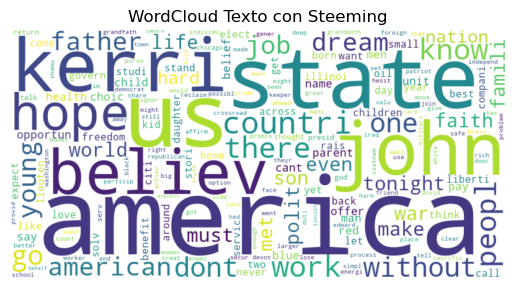

In [43]:
freq_stemmed = nltk.FreqDist(stemmed_tokens)

wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(freq_stemmed)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud Texto con Steeming')
plt.show()

El WordCloud del discurso luego de preprocesarlo nos presenta unos resultados muy parecidos a los encontrados con el stopwords. Aquí la palabra believe y hope comparten relevancia así que podriamos sintetizarlo, en español, como: Nosotros, América, creemos y tenemos esperanza en John Kerri. 

In [44]:
word_total_stemeed = len(stemmed_tokens)
unic_word_total_stemeed = len(set(stemmed_tokens))
riqueza = unic_word_total_stemeed/word_total_stemeed

print('Número de palabras totales después de StopWords: ', word_total_stemeed)
print('Número de palabras únicas después de StopWords: ', unic_word_total_stemeed)
print(f'Riqueza lingüística: {riqueza * 100:.2f}%')

Número de palabras totales después de StopWords:  1075
Número de palabras únicas después de StopWords:  607
Riqueza lingüística: 56.47%


La riqueza lingüística del discurso luego de haber sido preprocesado con steeming es muy similar a la del discurso lemantizado.

# 3. Análisis de sentimientos I: comparación entre diferentes preprocesamientos

En esta sección compararemos los resultados de hacer un análisis de sentimientos en textos con diferentes tipos de preprocesamiento. Primero utilizaremos TextBob para identificar la subjetividad u objetividad de los discursos y luegoSentiment Vader para determinar los puntajes según el sentimiento del discurso sea negativo, positivo o neutro

## Texto lemantizado

In [45]:
#creamos un objeto TextBlob con el texto preprocesado y contatenado
texto_lemmas = ' '.join(lemmas_token)
blob_lemmas = TextBlob(texto_lemmas)

#obtenemos la subjetividad del sentimiento
subjetividad_lemmas = blob_lemmas.sentiment.subjectivity

print("Subjetividad del sentimiento (Lemmas):", subjetividad_lemmas)

Subjetividad del sentimiento (Lemmas): 0.4292051187400024


In [46]:
#utilizamos el método con el texto lemantizado y concatenado como argumento
sentimiento_lemmas = SentimentIntensityAnalyzer().polarity_scores(texto_lemmas)

print(sentimiento_lemmas)

{'neg': 0.119, 'neu': 0.627, 'pos': 0.254, 'compound': 0.9995}


Podemos concluir que el texto lemantizado presenta un grado moderado de subjetividad (0.42 siendo 1 el máximo), lo que significa que aunque expresa algunas opiniones personales también habla sobre hechos y realidades. 

El análisis de sentimiento nos muestra que aunque predomina un sentimiento neutro (0.627) el 'compound' nos presenta un discurso muy positivo. 

## Texto preprocesado con steeming

In [48]:
#creamos un objeto TextBlob con el texto preprocesado y contatenado
texto_steemed = ' '.join(stemmed_tokens)
blob_steemed = TextBlob(texto_steemed)

#obtenemos la subjetividad del sentimiento
subjetividad_steemed = blob_steemed.sentiment.subjectivity

print("Subjetividad del sentimiento (Steemed):", subjetividad_steemed)

Subjetividad del sentimiento (Steemed): 0.4007860195360195


In [49]:
#utilizamos el método con el texto lemantizado y concatenado como argumento
sentimiento_steemed = SentimentIntensityAnalyzer().polarity_scores(texto_steemed)

print(sentimiento_steemed)

{'neg': 0.087, 'neu': 0.715, 'pos': 0.198, 'compound': 0.9991}


Con el texto preprocesado con steeeming el grado de subjetividad se mantiene muy similar al texto lemantizado (0.42 - 0.40), es decir nos presenta un discurso con un grado de subjetividad medio. 

En cuanto al análisis de sentimiento, observamos que los puntajes negativos y positivos bajan un poco, mientras que el nutro aumenta. El compound disminuye marginalmente en comparación con el texto lemantizado pero se mantiene muy alto (0.9991), lo que significa que el discurso es extremadamente positivo. 

Para ahondar un poco en el análisis de sentimientos hemos decidido realizar uno por frases. En este caso el texto no será preprocesado y lo tokenizaremos frase por frase. 

# 4. Análisis de sentimientos II: análisis de la estructura sentimental del discurso 

In [50]:
#tokenizamos el discurso por frases  
obama_sentences = nltk.sent_tokenize(obama)

#iteramos sobre cada frase para numerarla 
for number, sentence in enumerate(obama_sentences):
    print(number, sentence)

0 On behalf of the great state of Illinois, crossroads of a nation, land of Lincoln, let me express my deep gratitude for the privilege of addressing this convention.
1 Tonight is a particular honor for me because, let's face it, my presence on this stage is pretty unlikely.
2 My father was a foreign student, born and raised in a small village in Kenya.
3 He grew up herding goats, went to school in a tin-roof shack.
4 His father, my grandfather, was a cook, a domestic servant.
5 But my grandfather had larger dreams for his son.
6 Through hard work and perseverance my father got a scholarship to study in a magical place; America which stood as a beacon of freedom and opportunity to so many who had come before.
7 While studying here, my father met my mother.
8 She was born in a town on the other side of the world, in Kansas.
9 Her father worked on oil rigs and farms through most of the Depression.
10 The day after Pearl Harbor he signed up for duty, joined Patton's army and marched acros

In [52]:
#instanciamos sentiment analyser
sent_an = SentimentIntensityAnalyzer()

#creamos un objeto que contenga todas las frases del texto
sentences = obama_sentences

#creamos una lista vacía que popularemos con los resultados del método
sentence_scores = []

#iteramos sobre cada frase para obtener los resultados y agregamos el 'compound' a la lista vacía 
for number, sentence in enumerate(sentences):
    scores = sent_an.polarity_scores(sentence)
    sentence_scores.append({'Frase': sentence, 'Score': scores['compound']})

In [53]:
#creamos un dataframe con los resultados

obama_sentences_df = pd.DataFrame(sentence_scores)

#imprimimos las 3 frases más negativas
obama_sentences_df.sort_values(by='Score')[:3]

,Frase,Score
34,"More to do for the father I met who was losing his job and choking back tears, wondering how he would pay $4,500 a month for the drugs his son needs without the health benefits he counted on.",-0.8436
103,"I believe we can provide jobs to the jobless, homes to the homeless, and reclaim young people in cities across America from violence and despair.",-0.7506
9,Her father worked on oil rigs and farms through most of the Depression.,-0.6077


Las tres frases más negativas tienen que ver con las duras condiciones que viven o han vivido algunas norteamericanos. Se refiere a un padre que debe conseguir dinero para los medicamentos de su hijo pues no tienen seguridad social; a ciudadanos sin trabajo y sin casa; y a personas que tuvieron trabajos precarios durante la Gran Depresión. 

In [54]:
#imprimimos las 3 frases más positivas
obama_sentences_df.sort_values(by='Score', ascending=False)[:3]


,Frase,Score
99,"It's the hope of slaves sitting around a fire singing freedom songs; the hope of immigrants setting out for distant shores; the hope of a young naval lieutenant bravely patrolling the Mekong Delta; the hope of a mill worker's son who dares to defy the odds; the hope of a skinny kid with a funny name who believes that America has a place for him, too.",0.9702
15,My parents shared not only an improbable love; they shared an abiding faith in the possibilities of this nation.,0.8957
72,"And just as Lieutenant Kerry did not hesitate to risk his life to protect the men who served with him in Vietnam, President Kerry will not hesitate one moment to use our military might to keep America safe and secure.",0.8845


Las frases más positivas también se refieren a personas pero en este caso a aquellas que tienen esperanza en América, o que lucharon para mantener ese país seguro. 

Finalmente, visualizaremos como se modifican los sentimientos en la trayectoria del discurso. Esto nos permitirá entender cuáles son sus estrategias retóricas y de qué manera utilizan la emocionalidad. 

Lo haremos trazando una linea que representa el promedio movil de sentimientos cada 10 frases. 

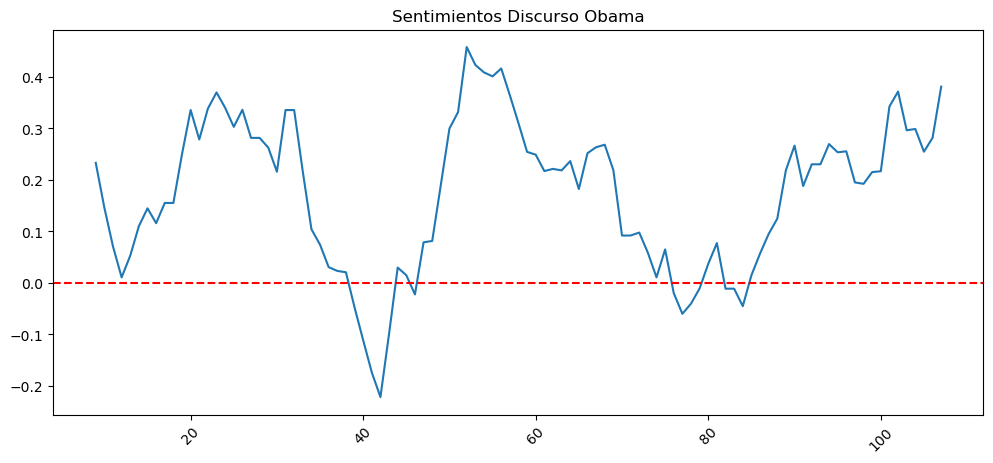

In [58]:
obama_sentences_df.rolling(10)['Score'].mean().plot(x=obama_sentences_df.index, 
                                                    y='Score', kind='line', figsize=(12,5),
                                                    rot=45, title='Sentimientos Discurso Obama')


plt.axhline(y=0, color='red', linestyle='--');

Este gráfico puede servir de síntesis de todos los análisis que hemos hecho hasta el momento: 
    
- Primero, demuestra que la tendencia del discurso es muy positiva, teniendo solo dos momentos donde se torna relativamente negativo
- Segundo, los momentos negativos son aquellos en los que Obama narra las dificultades que tuvieron sus padres o que han tenido algunos norteamericanos para tener unas buenas condiciones de vida. Sin embargo, la gráfica nos muestra que después de este bajonazo, Obama utiliza el concepto de esperanza para comunicar que incluso en esas situaciones tan difíciles esas personas que lo pasaron mal pudieron salir adelante. 
- Tercero, la gráfica nos muestra un discurso que maneja el ritmo de los sentimientos casi a la perfección. 
    * Cada momento negativo es correspondido por uno muy positivo. 
    * Tiene un climax de positividad justo en su mitad
    * Comienza y finaliza con sentimientos de positividad.